In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 0, 'Dress')

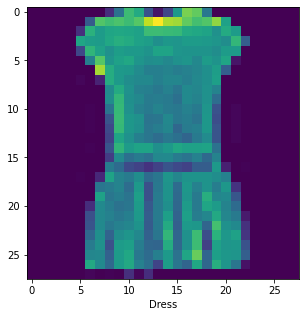

In [16]:
plt.figure(figsize=(15, 5))
plt.imshow(train_images[3])
plt.xlabel(classes[train_labels[3]])

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
ann_model = Sequential()
ann_model.add(Dense(300, activation='relu', input_shape=(28*28,)))
ann_model.add(Dense(340, activation='relu'))
ann_model.add(Dense(10, activation='softmax'))
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [21]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [22]:
ann_model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4725 - accuracy: 0.8292
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3574 - accuracy: 0.8680
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3213 - accuracy: 0.8803
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2956 - accuracy: 0.8890
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2806 - accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2649 - accuracy: 0.8997
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2517 - accuracy: 0.9047
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2408 - accuracy: 0.9082
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2351 - accuracy: 0.9109
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.223

In [29]:
ann_loss, ann_accuracy = ann_model.evaluate(test_images, test_labels_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8855


In [39]:
y_pred = ann_model.predict(test_images)
pred_classes = [np.argmax(element) for element in y_pred]
classes[test_labels[2]]


'Trouser'

In [40]:
classes[pred_classes[2]]

'Trouser'

In [41]:
cnn_model = Sequential([
    Conv2D(32, 3, input_shape=(28, 28, 1)),
    MaxPooling2D(2),
    Flatten(),
    Dense(10, activation='softmax'),
])

In [49]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [51]:
train_images = train_images / 255
test_images = test_images / 255

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [52]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [53]:
cnn_model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4547 - accuracy: 0.8430
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3384 - accuracy: 0.8815
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3047 - accuracy: 0.8935
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2806 - accuracy: 0.9004
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2653 - accuracy: 0.9071
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2504 - accuracy: 0.9119
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2369 - accuracy: 0.9165
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2278 - accuracy: 0.9193
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2179 - accuracy: 0.9230
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [54]:
cnn_model.evaluate(test_images, test_labels_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.3149 - accuracy: 0.8902


[0.3149430751800537, 0.8902000188827515]

In [56]:
y_pred = cnn_model.predict(test_images)
pred_classes = [np.argmax(element) for element in y_pred]
classes[pred_classes[0]]


'Ankle boot'

In [57]:
classes[test_labels[0]]

'Ankle boot'